In [1]:
# importing necessary liberaries to get started
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
warnings.filterwarnings("ignore")

### Column description:
    * CRIM: Per capita crime rate by town.
    * ZN: Proportion of residential land zoned for lots over 25,000 sq.ft.
    * INDUS: Proportion of non-retail business acres per town.
    * CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise).
    * NOX: Nitric oxides concentration (parts per 10 million).
    * RM: Average number of rooms per dwelling.
    * AGE: Proportion of owner-occupied units built prior to 1940.
    * DIS: Weighted distances to five Boston employment centers.
    * RAD: Index of accessibility to radial highways.
    * TAX: Full-value property tax rate per $10,000.
    * PTRATIO: Pupil-teacher ratio by town.
    * B: 1000(Bk - 0.63)^2 where Bk is the proportion of [people of African American descent] by town.
    * LSTAT: Percentage lower status of the population.
    * MEDV: Median value of owner-occupied homes in $1000s.

In [3]:
# since in the new version of the boston house price data set has been removed, there for i'm fetching the data
# with the help of url
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data"

# name of the features
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

# load data into the pandas dataframe
boston_data = pd.read_csv(url, header=None, delimiter=r"\s+", names=column_names)

boston_data.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
# count the number of rows in the data set
boston_data.count()

CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
MEDV       506
dtype: int64

In [5]:
# find the total number of null values in each of the columns
boston_data.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [6]:
# another way to find the missing values
boston_data.isnull().any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
MEDV       False
dtype: bool

In [7]:
# check the number of null values for the each of the columns
boston_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


### Discriptive Statistics

In [8]:
# lets look into the fice statis summery for the data
boston_data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [9]:
# the same way of doing this is by executing the following code
min_crim=boston_data.min()
print("min_crim:{}".format(min_crim))
max_crim=boston_data.max()
mean_crim=boston_data.mean()
median_crim=boston_data.median()

min_crim:CRIM         0.00632
ZN           0.00000
INDUS        0.46000
CHAS         0.00000
NOX          0.38500
RM           3.56100
AGE          2.90000
DIS          1.12960
RAD          1.00000
TAX        187.00000
PTRATIO     12.60000
B            0.32000
LSTAT        1.73000
MEDV         5.00000
dtype: float64


In [10]:
n_rows,n_columns=boston_data.shape
print("The number of rows us {} and numbers of columns is {}".format(n_rows,n_columns))

The number of rows us 506 and numbers of columns is 14


In [11]:
# rename MEDV to PRICE
boston_data.rename(columns={'MEDV':'PRICE'},inplace=True)

## model training

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X = boston_data.drop(columns=['PRICE'])
y = boston_data['PRICE']

In [14]:
X_train,y_train,X_test,y_test=train_test_split(X,y,test_size=0.8,random_state=5)
print('''The size of X_train is {},
        y_train is {},
        y_train is {}
        y_test {}
        '''.format(X_train.size,y_train.size,X_test.size,y_test.size))

The size of X_train is 1313,
        y_train is 5265,
        y_train is 101
        y_test 405
        


## Data Visualization

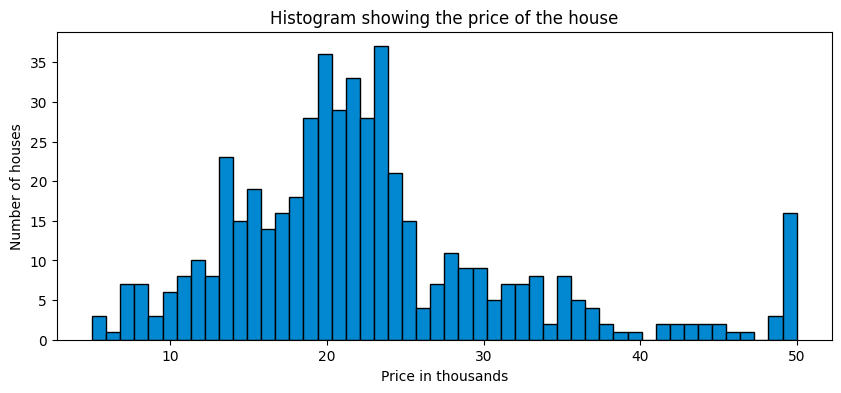

In [15]:
plt.figure(figsize=(10,4))
plt.hist(boston_data['PRICE'], bins=50,color='#0288D1', edgecolor='black')
# visualizing the data into multiple data bins helps us to understand data into more granual label, here bins=50.
plt.xlabel('Price in thousands')
plt.ylabel('Number of houses')
plt.title('Histogram showing the price of the house')
plt.show()

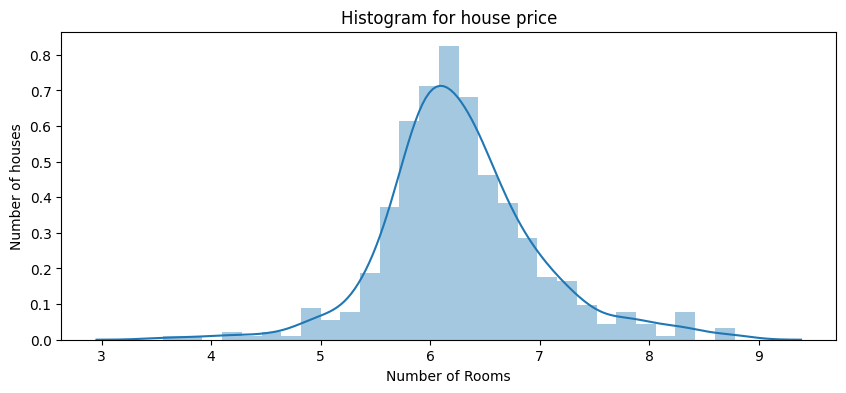

In [16]:
plt.figure(figsize=(10,4))
sns.distplot(boston_data['RM'], kde=True)
plt.xlabel('Number of Rooms')
plt.ylabel('Number of houses')
plt.title('Histogram for house price')
plt.show()

## Check for the correlation in between each independent variable and dependent variable

In [17]:
# correlation between price and Per capita crime rate by town
boston_data['CRIM'].corr(boston_data['PRICE'])

-0.38830460858681143

In [18]:
# correlation between price and Average number of rooms per dwelling
boston_data['RM'].corr(boston_data['PRICE'])

0.6953599470715393

In [19]:
# correlation between Price and Proportion of residential land zoned for lots over 25,000 sq.ft
boston_data['ZN'].corr(boston_data['PRICE'])

0.3604453424505435

In [20]:
# correlation between Price and Proportion of non-retail business acres per town.
boston_data['INDUS'].corr(boston_data['PRICE'])

-0.48372516002837357

In [21]:
# correlation between price and Charles River dummy variable
boston_data['CHAS'].corr(boston_data['PRICE'])

0.1752601771902987

In [22]:
# correlation between price and Proportion of owner-occupied units built prior to 1940
boston_data['AGE'].corr(boston_data['PRICE'])

-0.37695456500459623

In [23]:
# correlation between price and Weighted distances to five Boston employment centers
boston_data['DIS'].corr(boston_data['PRICE'])

0.24992873408590394

In [24]:
# correlation between price and Index of accessibility to radial highways.
boston_data['RAD'].corr(boston_data['PRICE'])

-0.3816262306397775

In [25]:
# correlation between price and Full-value property tax rate per $10,000.
boston_data['TAX'].corr(boston_data['PRICE'])

-0.46853593356776685

In [26]:
# correlation between price and Pupil-teacher ratio by town
boston_data['PTRATIO'].corr(boston_data['PRICE'])

-0.5077866855375616

In [27]:
# correlation between price and 1000(Bk - 0.63)^2 where Bk is the proportion of [people of African American descent] by town.
boston_data['B'].corr(boston_data['PRICE'])

0.3334608196570666

In [28]:
# correlation between price and Percentage lower status of the population
boston_data['LSTAT'].corr(boston_data['PRICE'])

-0.7376627261740151

In [29]:
new_mask = np.zeros_like(boston_data.corr())
traingle_indices = np.triu_indices_from(new_mask)
new_mask[traingle_indices]= True
new_mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [30]:
# lets check the correlation in the tabular format
boston_data.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5]),
 [Text(0, 0.5, 'CRIM'),
  Text(0, 1.5, 'ZN'),
  Text(0, 2.5, 'INDUS'),
  Text(0, 3.5, 'CHAS'),
  Text(0, 4.5, 'NOX'),
  Text(0, 5.5, 'RM'),
  Text(0, 6.5, 'AGE'),
  Text(0, 7.5, 'DIS'),
  Text(0, 8.5, 'RAD'),
  Text(0, 9.5, 'TAX'),
  Text(0, 10.5, 'PTRATIO'),
  Text(0, 11.5, 'B'),
  Text(0, 12.5, 'LSTAT'),
  Text(0, 13.5, 'PRICE')])

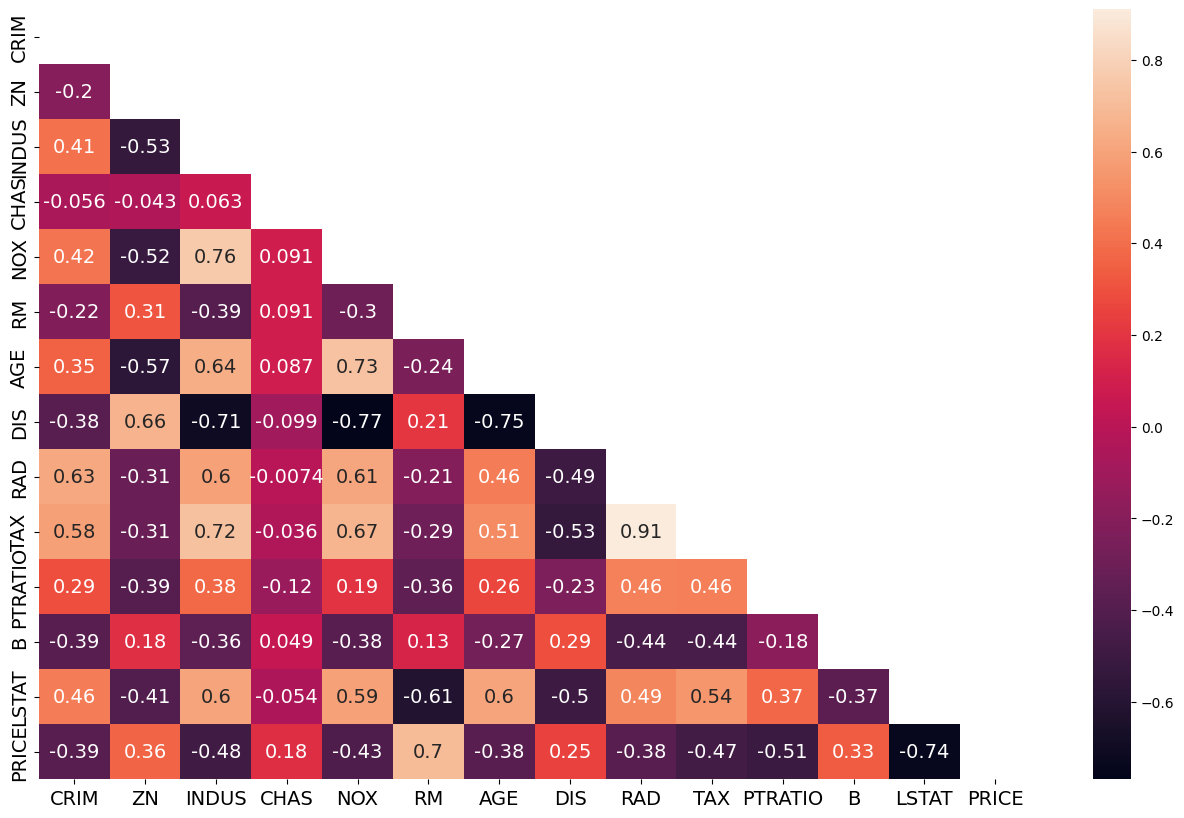

In [67]:
# visualize the entire correlation with singal graph
plt.figure(figsize=(16,10))
sns.heatmap(boston_data.corr(), annot=True, mask=new_mask, annot_kws={'size':14})
sns.set_style('white')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

In [32]:
# lets test for multicollinearity
# check if dis feature add explanatory power to your model
# identifies strong correlation

In [33]:
# relationship between pollution and distance from the employment center

In [34]:
boston_data['NOX'].corr(boston_data['DIS'])

-0.7692301132258278

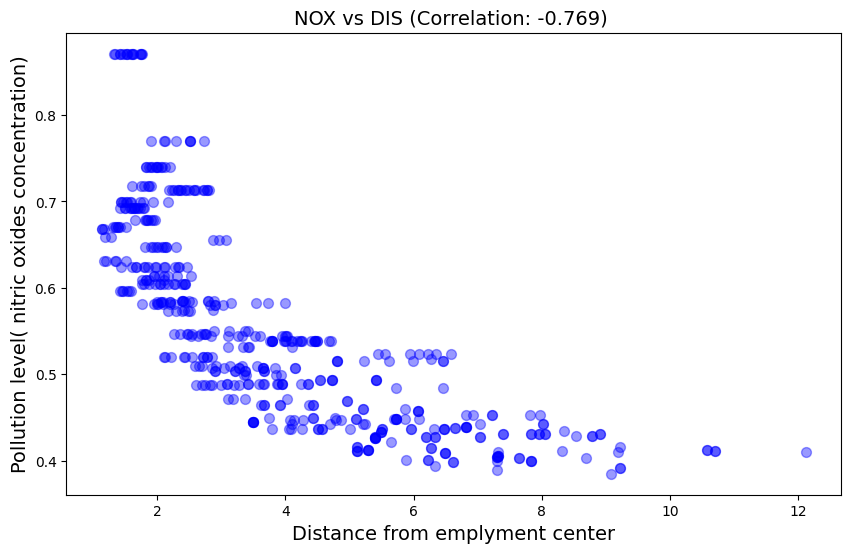

In [35]:
plt.figure(figsize=(10,6))
corr = np.around(boston_data['NOX'].corr(boston_data['DIS']),3)
plt.scatter(boston_data['DIS'], boston_data['NOX'], s=50, c='blue', alpha=0.4)
plt.xlabel('Distance from emplyment center',fontsize=14)
plt.ylabel('Pollution level( nitric oxides concentration)',fontsize=14)
plt.title('NOX vs DIS (Correlation: {}) '.format(corr),fontsize=14)
plt.show()

In [36]:
boston_data['TAX'].corr(boston_data['RAD'])

0.9102281885331835

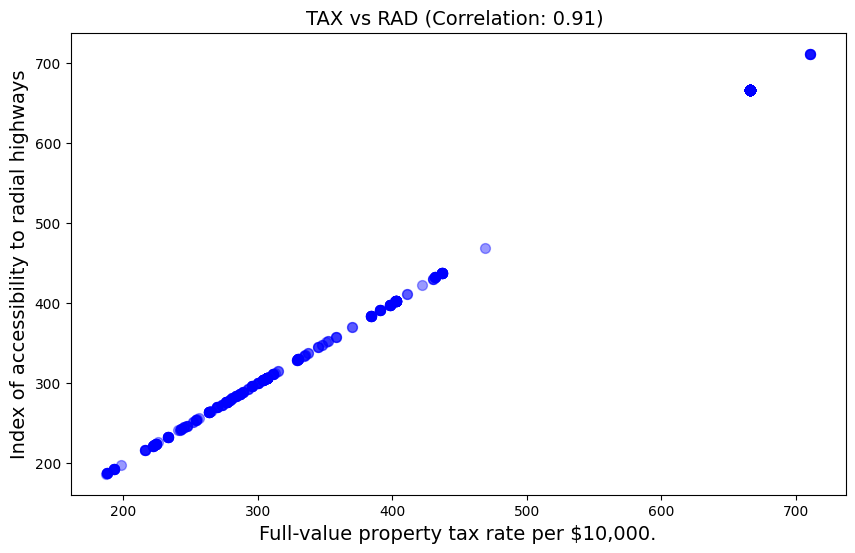

In [37]:
plt.figure(figsize=(10,6))
corr = np.around(boston_data['TAX'].corr(boston_data['RAD']),3)
plt.scatter(boston_data['TAX'], boston_data['TAX'], s=50, c='blue', alpha=0.4)
plt.xlabel('Full-value property tax rate per $10,000.',fontsize=14)
plt.ylabel('Index of accessibility to radial highways',fontsize=14)
plt.title('TAX vs RAD (Correlation: {}) '.format(corr),fontsize=14)
plt.show()

In [38]:
boston_data['RM'].corr(boston_data['PRICE'])

0.6953599470715393

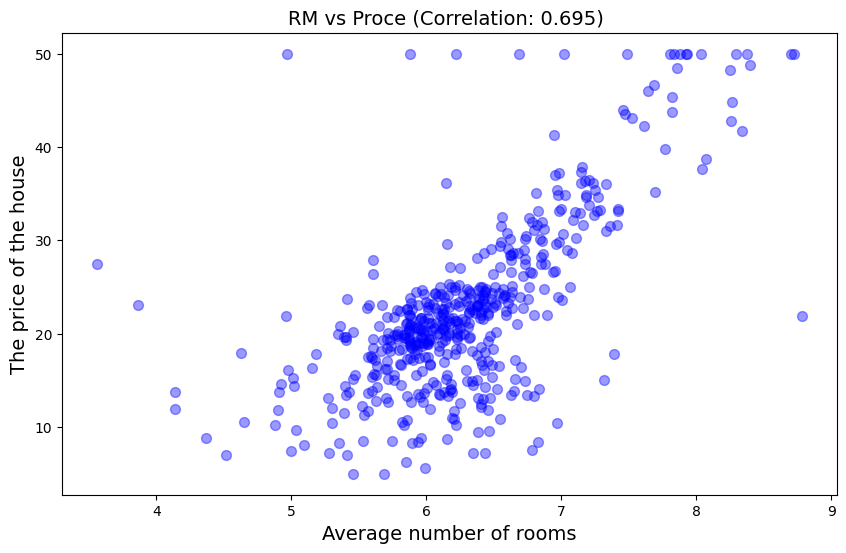

In [39]:
plt.figure(figsize=(10,6))
corr = np.around(boston_data['RM'].corr(boston_data['PRICE']),3)
plt.scatter(boston_data['RM'], boston_data['PRICE'], s=50, c='blue', alpha=0.4)
plt.xlabel('Average number of rooms',fontsize=14)
plt.ylabel('The price of the house',fontsize=14)
plt.title('RM vs Proce (Correlation: {}) '.format(corr),fontsize=14)
plt.show()

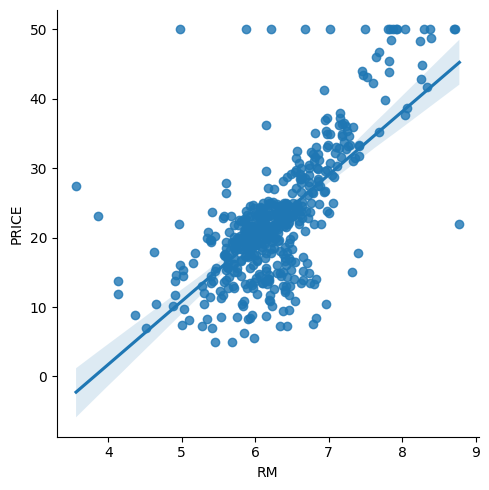

In [40]:
#lmplot:"linear model plot." It is a function used to create a scatter plot with a linear regression model fit to the data.
sns.lmplot(x='RM', y='PRICE', data=boston_data, height=5)
plt.show()

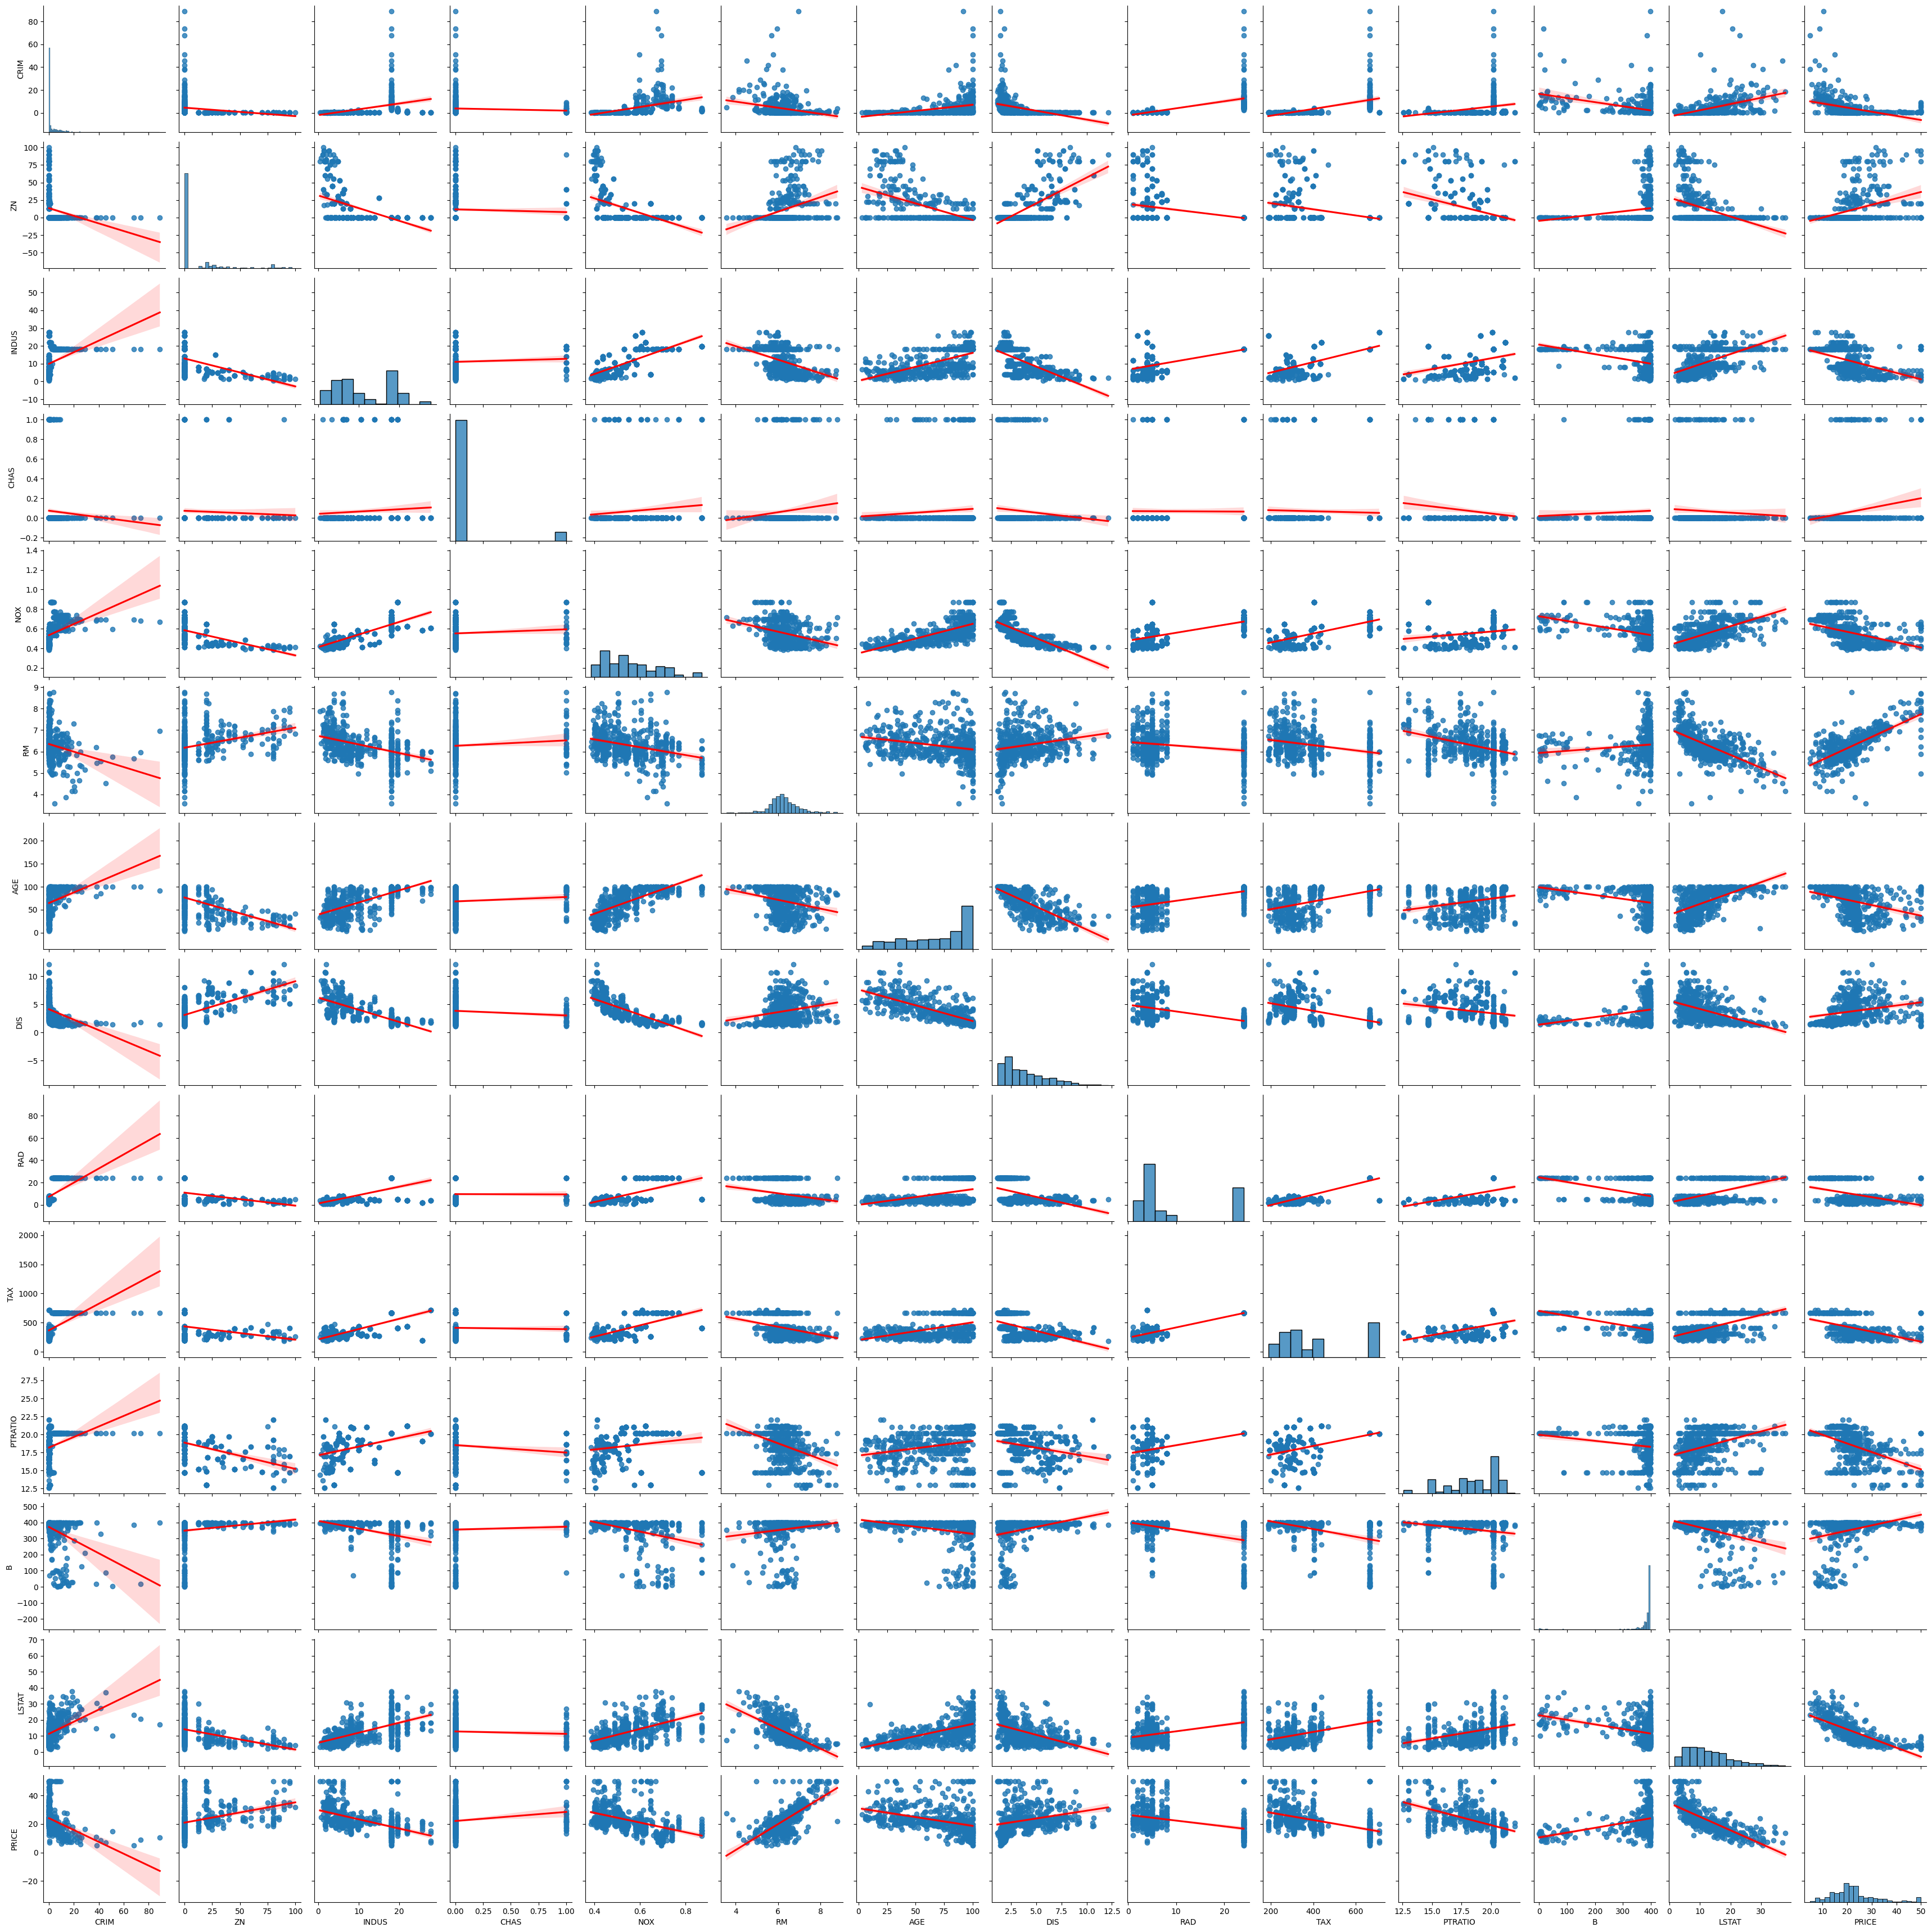

In [41]:
sns.pairplot(boston_data,kind='reg', plot_kws={'line_kws':{'color':'red'}})

## Spliting the data into training and test set

In [42]:
price=boston_data['PRICE']
features=boston_data.drop('PRICE',axis=1)

In [43]:
X_train,X_test,y_train,y_test=train_test_split(features,price,test_size=0.2,random_state=5)

## Data Standarization

In [44]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [45]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

## Data Modeling

In [46]:
regression=LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [47]:
# getting the coefficients
print('Cofficients',regression.coef_) #will be equal to the number of independent variables

# getting the intersept from the model object
print('Intercept',regression.intercept_)

# getting r-squared value for training and test dataset
print('Training data r-squared value: ', regression.score(X_train, y_train))

# getting r-squared value for training and test dataset
print('Test data r-squared value: ', regression.score(X_test, y_test))


feature = boston_data.columns.drop('PRICE')
pd.DataFrame(regression.coef_, index=feature, columns=['Correlation Coefficient'])

Cofficients [-1.13502719  1.15814527  0.00737057  0.68709635 -1.82837001  2.36271879
  0.03166538 -3.06632775  3.16621482 -2.21457852 -2.08600876  1.0449511
 -4.17627077]
Intercept 22.646782178217823
Training data r-squared value:  0.738339392059052
Test data r-squared value:  0.7334492147453074


,Correlation Coefficient
CRIM,-1.135027
ZN,1.158145
INDUS,0.007371
CHAS,0.687096
NOX,-1.828370
RM,2.362719
AGE,0.031665
DIS,-3.066328
RAD,3.166215
TAX,-2.214579


In [48]:
# on which parameter the model has been trainned
regression.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [49]:
#Prediction
y_pred = regression.predict(X_test)
y_pred

array([37.56311787, 32.14445143, 27.06573629,  5.67080633, 35.09982577,
        5.85803701, 27.53708506, 31.81019188, 26.35634771, 22.77208748,
       31.91183048, 21.50224061, 23.70119983, 33.3622504 , 28.51633591,
       14.39456899,  0.19284025, 18.66247155, 13.71004139, 14.13408635,
        2.03263952, 19.7280831 , 38.18657429, 24.19760058, 31.30247973,
       11.14144544, 25.03636951, 23.27970871, 22.49420127, 20.52972594,
       15.16513744,  6.92553586, 18.3557733 , 22.37179804, 28.91287973,
       19.02980786, 30.19357214,  8.74384915, 40.86691522, 34.53763591,
       20.70224878,  2.59618963, 29.99590282, 12.15704798, 27.10186397,
       30.8052437 , -6.24169079, 19.84885777, 20.92973441, 12.43523958,
       20.4949947 , 19.19231742, 23.69073157, 12.67998473, 17.14252424,
       25.04649176, 34.77758126, 15.23294903, 28.22306193, 21.08745388,
       20.39506129, 25.79476888, 14.72463673, 33.18635032, 23.17771307,
       13.11057248, 19.23154617, 24.61162961, 21.50327036, 22.00

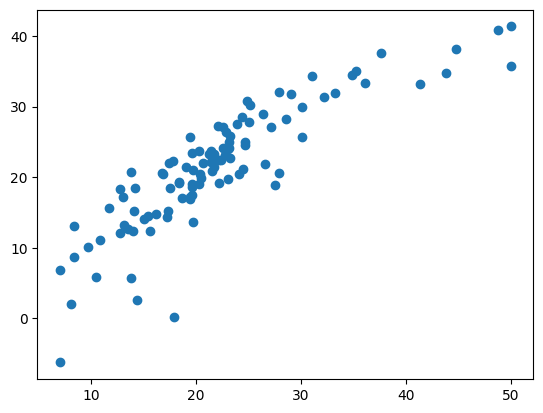

In [50]:
# Scatter plot for the prediction
plt.scatter(y_test,y_pred)
# shows there is a linear relationship

In [51]:
residuals=y_test-y_pred
residuals

226    0.036882
292   -4.244451
90    -4.465736
373    8.129194
273    0.100174
         ...   
349    4.687044
212    0.005226
156   -0.093354
480   -0.969911
248    3.300853
Name: PRICE, Length: 102, dtype: float64

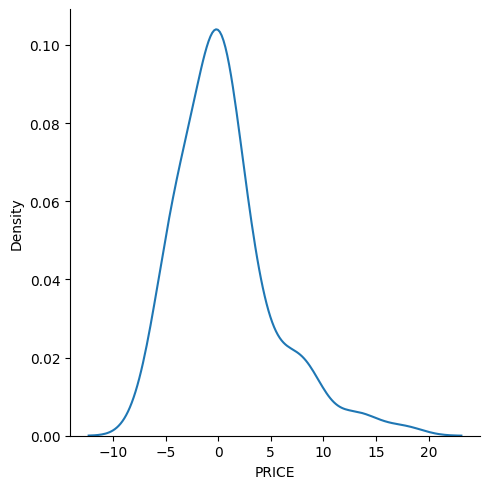

In [52]:
# plotting the residuals
sns.displot(residuals,kind='kde')
# shows error are normally distributed with some error or the outliers

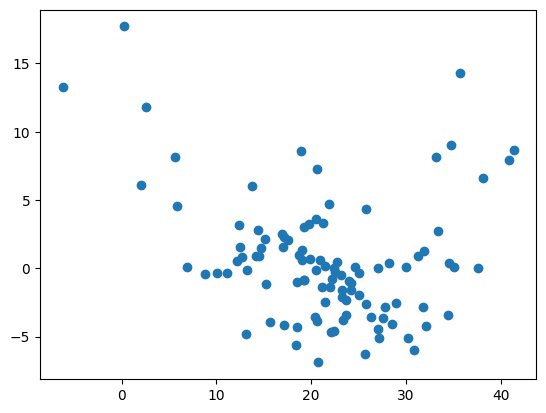

In [53]:
# Scatter plot with respect to prediction and residuals
plt.scatter(y_pred,residuals)
# data is uniformly distributed

## Model Evaluation

In [54]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error (MSE): 20.86929218377082
Root Mean Squared Error (RMSE): 4.5682920423032085


### R square and adjusted R square
Formula
### R2=1-SSR-SST
where, r2= coefficient of determination, SSR=sun of square of residuals and SST= toatl sun of square

In [55]:
r2 = r2_score(y_test, y_pred)
print("R-squared (R2) Score:", r2)

R-squared (R2) Score: 0.7334492147453074


### Adjusted R2=1-[(1-r2)*(n-1)/(n-k-1)]
where, r2 is r square, n: toatl number of obervations, k: toatl number of predictor variables

In [56]:
adjusted_r2=1-(1-r2)*(len(y_test)-1)/(len(y_test-X_test.shape[1]-1))
adjusted_r2

0.7360624577380005

In [57]:
#new data prediction
X_pred=boston_data.iloc[:1]
X_pred = np.array(X_pred.drop('PRICE', axis=1))

In [58]:
X_pred.shape

(1, 13)

In [59]:
# transformation of a new data
scaler.transform(X_pred)

array([[-0.40846511,  0.26005999, -1.26841579, -0.27288841, -0.11848409,
         0.41403804, -0.08908813,  0.12498638, -0.98174471, -0.64904362,
        -1.4267223 ,  0.42842369, -1.06659966]])

In [60]:
regression.predict(scaler.transform(X_pred))

array([30.23074628])

## Pickling the model file for deployement

In [61]:
import pickle

In [62]:
pickle.dump(regression,open('regression_model.pkl','wb'))

In [63]:
# loading of the pickled model
pickled_model=pickle.load(open('regression_model.pkl','rb'))

In [64]:
# we should get the sampe output prediction for same data ie.scaler.transform(X_pred)
pickled_model.predict(scaler.transform(X_pred))

array([30.23074628])